# **도표 2-12. [예제 2-1] 퍼셉트론 AND 연산의 ChatGPT 파이썬 코드의 코랩 실행 결과**

,x1,x2,y = 0.6x1 + 0.6x2 - 1,z = step(y),x1 AND x2
0,0,0,-1.0,0,0
1,0,1,-0.4,0,0
2,1,0,-0.4,0,0
3,1,1,0.2,1,1


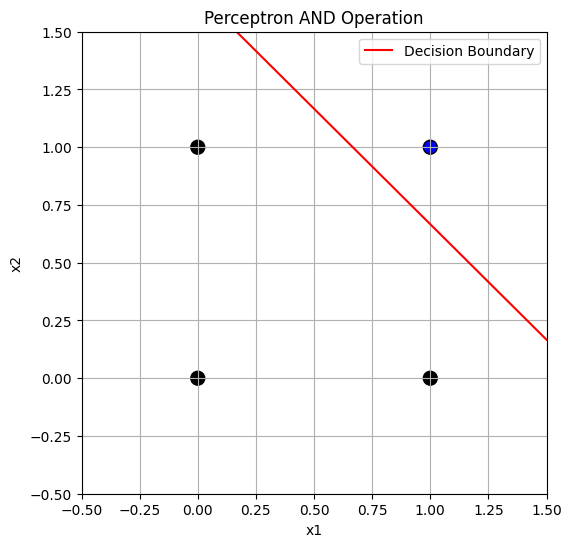

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 계단 함수 정의
def step_function(x):
    return 1 if x > 0 else 0

# 입력값, 가중치, 편향 설정
inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
weights = [0.6, 0.6]
bias = -1

# 결과 저장용 리스트
results = []

for x1, x2 in inputs:
    y = weights[0] * x1 + weights[1] * x2 + bias
    z = step_function(y)
    and_result = x1 & x2
    results.append([x1, x2, round(y, 2), z, and_result])

# 표 생성 및 출력
columns = ["x1", "x2", "y = 0.6x1 + 0.6x2 - 1", "z = step(y)", "x1 AND x2"]
df = pd.DataFrame(results, columns=columns)
display(df)

# 시각화
x_vals = [x[0] for x in inputs]
y_vals = [x[1] for x in inputs]
colors = ['blue' if (x[0] & x[1]) == 1 else 'black' for x in inputs]

# 결정경계: 0.6*x1 + 0.6*x2 - 1 = 0 → x2 = (-0.6*x1 + 1)/0.6
x_line = np.linspace(-0.5, 1.5, 100)
y_line = (-weights[0] * x_line - bias) / weights[1]

plt.figure(figsize=(6, 6))
plt.scatter(x_vals, y_vals, c=colors, s=100, edgecolors='k')
plt.plot(x_line, y_line, 'r-', label='Decision Boundary')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron AND Operation')
plt.legend()
plt.grid(True)
plt.show()


# **도표 2-13. [예제 2-2] 퍼셉트론 AND 연산의 ChatGPT 답변의 파이썬 코드**

AND 연산 결과표 (가중치: 0.3, 0.1):
   x1  x2  y = 0.3x1 + 0.1x2 - 1  z = step(y)  x1 AND x2
0   0   0                   -1.0            0          0
1   0   1                   -0.9            0          0
2   1   0                   -0.7            0          0
3   1   1                   -0.6            0          1


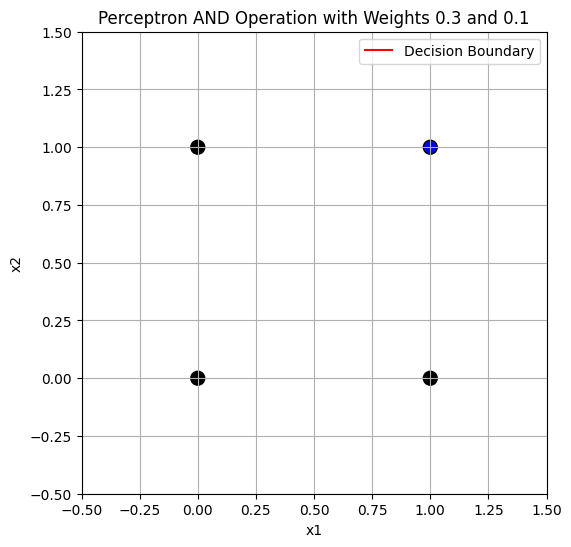

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 계단 함수 정의
def step_function(x):
    return 1 if x > 0 else 0

# 입력값, 가중치, 편향 설정
inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
weights = [0.3, 0.1]
bias = -1

# 결과 저장용 리스트
results = []

for x1, x2 in inputs:
    y = weights[0] * x1 + weights[1] * x2 + bias
    z = step_function(y)
    and_result = x1 & x2
    results.append([x1, x2, round(y, 2), z, and_result])

# 표 생성
columns = ["x1", "x2", "y = 0.3x1 + 0.1x2 - 1", "z = step(y)", "x1 AND x2"]
df = pd.DataFrame(results, columns=columns)

# 표 출력
print("AND 연산 결과표 (가중치: 0.3, 0.1):")
print(df)

# 시각화
x_vals = [x[0] for x in inputs]
y_vals = [x[1] for x in inputs]
colors = ['blue' if (x[0] & x[1]) == 1 else 'black' for x in inputs]

# 결정경계: 0.3*x1 + 0.1*x2 - 1 = 0 → x2 = (-0.3*x1 + 1)/0.1
x_line = np.linspace(-0.5, 1.5, 100)
y_line = (-weights[0] * x_line - bias) / weights[1]

# 그래프 출력
plt.figure(figsize=(6, 6))
plt.scatter(x_vals, y_vals, c=colors, s=100, edgecolors='k')
plt.plot(x_line, y_line, 'r-', label='Decision Boundary')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron AND Operation with Weights 0.3 and 0.1')
plt.legend()
plt.grid(True)
plt.show()



# **“입력값을 주면, 가중치와 편향을 이용해 자동으로 정답(예: AND 결과)을 잘 분류하는 구조”**

In [1]:
import numpy as np

# 계단 함수 정의: 입력값이 0보다 크면 1, 그렇지 않으면 0을 반환하는 이진 출력 함수
def step_function(x):
    return 1 if x > 0 else 0

# 퍼셉트론 클래스 정의
class Perceptron:
    # 생성자: 입력 차원과 학습률을 받아 초기 가중치와 편향을 설정
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.zeros(input_size)  # 초기 가중치를 0으로 설정
        self.bias = 0.0                      # 초기 편향을 0으로 설정
        self.lr = learning_rate              # 학습률 설정

    # 예측 함수: 선형 결합 후 계단 함수 적용하여 결과 출력
    def predict(self, x):
        z = np.dot(self.weights, x) + self.bias  # 선형 결합: w1*x1 + w2*x2 + b
        return step_function(z)                  # 계단 함수로 이진 분류

    # 학습 함수: 지정한 epoch 수만큼 모든 데이터를 학습
    def train(self, X, y, epochs=10):
        for epoch in range(epochs):
            print(f"[Epoch {epoch+1}]")
            for xi, target in zip(X, y):
                prediction = self.predict(xi)           # 현재 입력에 대한 예측값
                error = target - prediction             # 오차 계산
                self.weights += self.lr * error * xi    # 가중치 업데이트
                self.bias += self.lr * error            # 편향 업데이트
                # 학습 과정 출력 (디버깅 목적)
                print(f"  Input: {xi}, Prediction: {prediction}, Target: {target}, Error: {error}")
            # Epoch마다 업데이트된 가중치와 편향 출력
            print(f"  Weights: {self.weights}, Bias: {self.bias}\n")

# 입력 데이터 정의: 2개의 입력값 조합 (AND 연산)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# 정답 레이블 정의: AND 연산 결과
y = np.array([0, 0, 0, 1])

# 퍼셉트론 객체 생성: 입력 크기 2, 학습률 0.1
p = Perceptron(input_size=2, learning_rate=0.1)

# 학습 수행: 전체 데이터를 10번 반복 학습
p.train(X, y, epochs=10)

# 학습 완료 후 최종 가중치와 편향 출력
print("최종 학습된 가중치와 편향:")
print(f"  Weights: {p.weights}")
print(f"  Bias: {p.bias}")

# 학습된 모델을 이용한 예측 결과 확인
print("\n입력값에 대한 예측 결과:")
for xi in X:
    result = p.predict(xi)
    print(f"  Input: {xi}, Predicted: {result}")



[Epoch 1]
  Input: [0 0], Prediction: 0, Target: 0, Error: 0
  Input: [0 1], Prediction: 0, Target: 0, Error: 0
  Input: [1 0], Prediction: 0, Target: 0, Error: 0
  Input: [1 1], Prediction: 0, Target: 1, Error: 1
  Weights: [0.1 0.1], Bias: 0.1

[Epoch 2]
  Input: [0 0], Prediction: 1, Target: 0, Error: -1
  Input: [0 1], Prediction: 1, Target: 0, Error: -1
  Input: [1 0], Prediction: 0, Target: 0, Error: 0
  Input: [1 1], Prediction: 0, Target: 1, Error: 1
  Weights: [0.2 0.1], Bias: 0.0

[Epoch 3]
  Input: [0 0], Prediction: 0, Target: 0, Error: 0
  Input: [0 1], Prediction: 1, Target: 0, Error: -1
  Input: [1 0], Prediction: 1, Target: 0, Error: -1
  Input: [1 1], Prediction: 0, Target: 1, Error: 1
  Weights: [0.2 0.1], Bias: -0.1

[Epoch 4]
  Input: [0 0], Prediction: 0, Target: 0, Error: 0
  Input: [0 1], Prediction: 0, Target: 0, Error: 0
  Input: [1 0], Prediction: 1, Target: 0, Error: -1
  Input: [1 1], Prediction: 0, Target: 1, Error: 1
  Weights: [0.2 0.2], Bias: -0.1

[Epoc